In [32]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical # For hot encoding y labels
import random
import matplotlib.pyplot as plt

In [33]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # loading the dataset from mnist

In [34]:
num_of_samples = [] # number of images of each label
num_classes = 10 # 10 digits from 0 to 9
cols = 5 

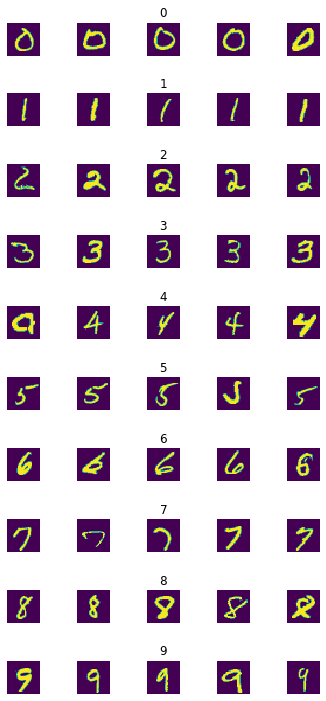

In [35]:
# Visualizing the data

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10)) # Creating grid
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1)])
        axs[j][i].axis('off')
        
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))       

In [36]:
# Hot encoding the data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [37]:
# Normalizing the dataset
X_train = X_train / 255
X_test = X_test/ 255

In [38]:
# Formatting the dataset
num_pixels = 28 * 28
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

(60000, 28, 28)


In [41]:
def create_model():
    model = Sequential()
    model.add(Dense(512, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [43]:
model = create_model()
# Fitting the model
h = model.fit(x=X_train, y=y_train, verbose=1, validation_split=0.1, epochs=10, batch_size=200, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 65us/step - loss: 0.3237 - acc: 0.9099 - val_loss: 0.1338 - val_acc: 0.9648
Epoch 2/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.1349 - acc: 0.9619 - val_loss: 0.0931 - val_acc: 0.9738
Epoch 3/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.0888 - acc: 0.9745 - val_loss: 0.0786 - val_acc: 0.9775
Epoch 4/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.0639 - acc: 0.9817 - val_loss: 0.0725 - val_acc: 0.9800
Epoch 5/10
54000/54000 [==============================] - 3s 57us/step - loss: 0.0491 - acc: 0.9862 - val_loss: 0.0701 - val_acc: 0.9787
Epoch 6/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.0375 - acc: 0.9894 - val_loss: 0.0664 - val_acc: 0.9810
Epoch 7/10
54000/54000 [==============================] - 3s 60us/step - loss: 0.0283 - acc: 0.9926 - val_loss: 0.0626 - val_acc:

Text(0.5, 0, 'epochs')

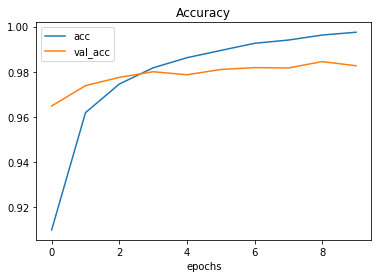

In [44]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epochs')

In [46]:
# Evaluating the model

val_loss, val_acc = model.evaluate(X_test, y_test)
print("The LOSS is : " + str(val_loss))
print("Accuracy of the model : " + str(val_acc * 100) + '%')

10000/10000 [==============================] - 0s 29us/step
The LOSS is : 0.061867225000972394
Accuracy of the model : 98.1%
